In [11]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


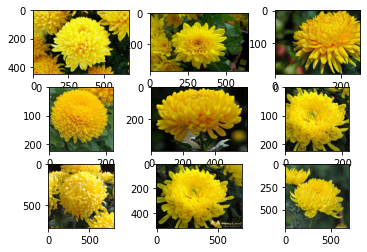

In [12]:
drive.mount('/content/drive')
folder= '/content/drive/MyDrive/Flowers/train/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'Cuc.'+ str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [13]:
folder = '/content/drive/MyDrive/Flowers/train/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoamattroi'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoathuocduoc'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoavantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Flowers_photos.npy', photos)
save('Flowers_labels.npy', labels)

(40, 150, 150, 3) (40,)


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))


In [24]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=50, verbose=1)
model.save('Flowers.h5')

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0041 - accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 25.2911 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 2.5767 - accuracy: 0.6750
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 2.3053 - accuracy: 0.5500
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 6.6189 - accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 3.4848 - accuracy: 0.4750
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 2.8002 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 2s 2s/step - loss: 1.3802 - accuracy: 0.5750
Epoch 9/50
1/1 [==============================] - 1s 1s/step - loss: 1.0278 - accuracy: 0.6250
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.7118 - accuracy: 0.6500
Epoch 11/50
1/1 [==============================]

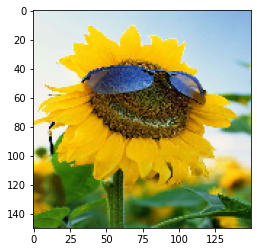

[[0.06411827 0.07193921 0.06474038 0.06800047 0.05999181 0.06169697
  0.06106202 0.06136627 0.05903726 0.06247772 0.06060787 0.05915389
  0.0623047  0.06061232 0.06335579 0.05953507]]


'Hoamatroi'

In [27]:
classes = ["Cuc","Hoamatroi","Hoathuocduoc","Hoavantho"]
img = load_img('/content/hinh4.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
plt.show()
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

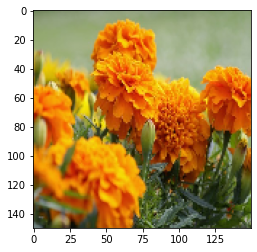

[[0.06457336 0.06999661 0.06462401 0.07080598 0.05939786 0.06263667
  0.06097179 0.06070741 0.05927882 0.06236125 0.06117861 0.05976608
  0.06208085 0.0603816  0.06171043 0.05952864]]


'Hoavantho'

In [28]:
classes = ["Cuc","Hoamatroi","Hoathuocduoc","Hoavantho"]
img = load_img('/content/hinh1.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
plt.show()
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

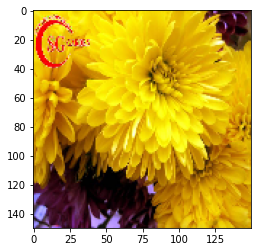

[[0.06989258 0.06814911 0.06561776 0.06721918 0.05916459 0.06209854
  0.06181139 0.06070006 0.06101106 0.06102671 0.06022637 0.05986537
  0.05992127 0.06260589 0.06123345 0.05945674]]


'Cuc'

In [29]:
classes = ["Cuc","Hoamatroi","Hoathuocduoc","Hoavantho"]
img = load_img('/content/hinh2.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
plt.show()
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

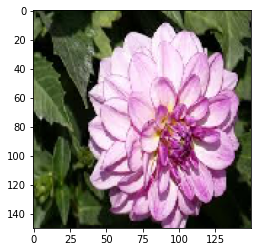

[[0.06709988 0.06726532 0.07474612 0.07061451 0.05564621 0.06306747
  0.06261571 0.05977982 0.05835562 0.05838912 0.05780309 0.06365415
  0.06060501 0.06024702 0.05740299 0.06270793]]


'Hoathuocduoc'

In [30]:
classes = ["Cuc","Hoamatroi","Hoathuocduoc","Hoavantho"]
img = load_img('/content/hinh3.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
plt.show()
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]